In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ellipse import LsqEllipse
from load_and_process import find_horizontal_axis_angle, rotate_points, moving_average_smoothing
from scipy.ndimage import median_filter

In [2]:
path = '/home/ikharitonov/Desktop/sleap_training/'
file = 'second_ellipse.003_20204321_343_5.analysis.csv'
df = pd.read_csv(path+file)
df

,track,frame_idx,instance.score,left.x,left.y,left.score,center.x,center.y,center.score,right.x,...,p2.score,p8.x,p8.y,p8.score,p4.x,p4.y,p4.score,p6.x,p6.y,p6.score
0,NaN,0,NaN,30.098503,183.755737,NaN,135.012780,156.221634,NaN,269.288632,...,NaN,100.120031,188.017810,NaN,168.908319,123.859011,NaN,165.710764,189.323207,NaN
1,NaN,1,10.299853,29.928240,183.859467,0.906243,135.843323,156.039566,0.940850,270.218414,...,0.927483,101.874626,188.069046,0.924287,169.743134,124.028069,0.940773,167.756516,189.751663,0.902475
2,NaN,2,10.309512,29.864458,182.192261,0.885018,134.164429,156.009537,0.945554,271.867157,...,0.947799,100.180702,188.222885,0.960958,169.816925,123.965485,0.933206,167.715759,189.825195,0.883926
3,NaN,3,10.257852,29.822008,182.182114,0.881487,134.090759,156.008041,0.948546,271.752930,...,0.945182,100.114777,188.138855,0.955913,169.757278,123.968246,0.908748,168.040726,188.063324,0.953332
4,NaN,4,10.400537,29.853571,182.212814,0.875701,134.118958,155.955917,0.959233,271.813385,...,0.955354,100.022308,187.938156,0.971927,169.851013,123.924416,0.951482,168.148407,188.126663,0.892221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27838,NaN,27858,10.211238,32.080292,183.936462,0.913815,138.144318,162.170609,0.930936,272.095764,...,0.963983,128.212296,171.903412,0.841206,148.302811,152.153030,1.036520,148.014328,172.209427,0.954158
27839,NaN,27859,10.174915,32.060841,183.755219,0.903187,138.091232,162.178085,0.929457,272.132812,...,0.962262,128.228607,171.874573,0.835356,148.203110,152.207077,1.039286,147.910248,172.177383,0.967416
27840,NaN,27860,10.154961,32.028248,183.805023,0.925700,138.192947,162.201752,0.929702,272.211884,...,0.968969,128.317841,171.919479,0.839643,148.304581,152.245300,1.021459,148.010880,172.214355,0.975907
27841,NaN,27861,10.093005,32.011517,183.807724,0.943651,138.201584,162.166412,0.923574,272.136932,...,0.972047,129.711578,171.901993,0.842626,149.787750,152.162689,1.029769,148.099594,172.169250,0.962196


In [3]:
columns_of_interest = ['left.x','left.y','center.x','center.y','right.x','right.y','p1.x','p1.y','p2.x','p2.y','p3.x','p3.y','p4.x','p4.y','p5.x','p5.y','p6.x','p6.y','p7.x','p7.y','p8.x','p8.y']
coordinates_dict = {key:df[key].to_numpy() for key in columns_of_interest}

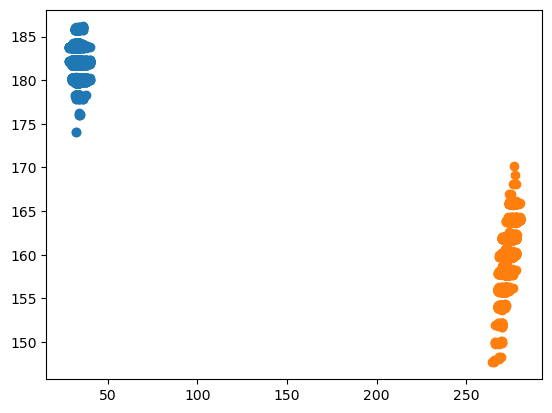

In [4]:
plt.scatter(coordinates_dict['left.x'], coordinates_dict['left.y'])
plt.scatter(coordinates_dict['right.x'], coordinates_dict['right.y'])
plt.show()

In [5]:
theta = find_horizontal_axis_angle(df, 'left', 'right')
theta

-0.0922250964526222

In [6]:
# Mean center point calculation
x = np.hstack([coordinates_dict['left.x'], coordinates_dict['right.x']]).mean()
y = np.hstack([coordinates_dict['left.y'], coordinates_dict['right.y']]).mean()
center_point = (x, y)
center_point

(153.08486501475366, 170.97676201624037)

In [7]:
all_points = ['left', 'right', 'center', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']
# Combining separated x and y number arrays into (samples, 2)-shaped array and subtracting the inferred center point from above
remformatted_coordinates_dict = {p:np.stack([coordinates_dict[f'{p}.x'], coordinates_dict[f'{p}.y']], axis=1) for p in all_points}
centered_coordinates_dict = {point: arr - center_point for point, arr in remformatted_coordinates_dict.items()}
rotated_coordinates_dict = {point: rotate_points(arr, theta) for point, arr in centered_coordinates_dict.items()}

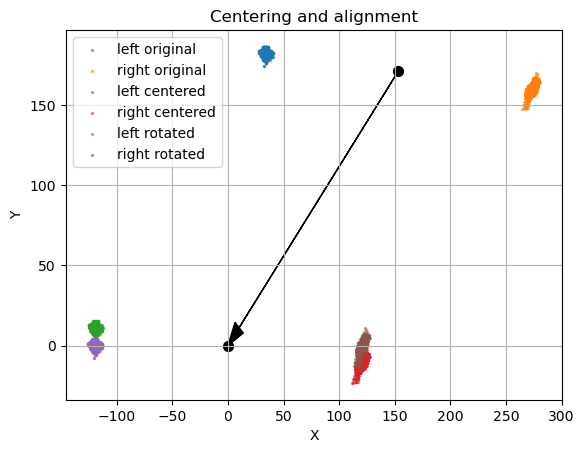

In [8]:
plt.title('Centering and alignment')

plt.scatter(remformatted_coordinates_dict['left'][:,0], remformatted_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(remformatted_coordinates_dict['right'][:,0], remformatted_coordinates_dict['right'][:,1], s=2, alpha=0.5)

plt.scatter(centered_coordinates_dict['left'][:,0], centered_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(centered_coordinates_dict['right'][:,0], centered_coordinates_dict['right'][:,1], s=2, alpha=0.5)


plt.scatter(rotated_coordinates_dict['left'][:,0], rotated_coordinates_dict['left'][:,1], s=2, alpha=0.5)
plt.scatter(rotated_coordinates_dict['right'][:,0], rotated_coordinates_dict['right'][:,1], s=2, alpha=0.5)

plt.scatter(center_point[0], center_point[1], s=50, c='black')
plt.scatter(0, 0, s=50, c='black')
plt.arrow(center_point[0], center_point[1], -center_point[0], -center_point[1], length_includes_head=True, head_width=10, color='black')

plt.legend(['left original', 'right original', 'left centered', 'right centered', 'left rotated', 'right rotated'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

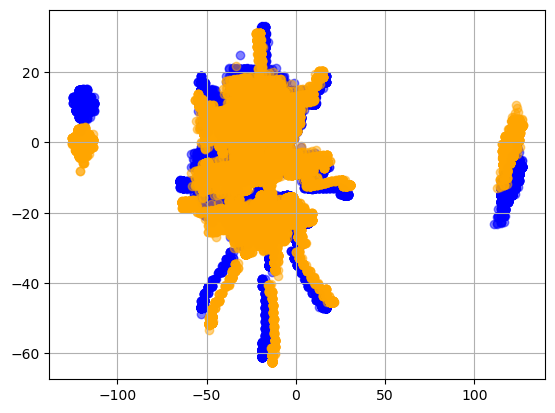

In [9]:
for point, arr in centered_coordinates_dict.items():
    plt.scatter(arr[:,0], arr[:,1], c='blue', alpha=0.5)

for point, arr in rotated_coordinates_dict.items():
    plt.scatter(arr[:,0], arr[:,1], c='orange', alpha=0.5)

plt.grid()
plt.show()

In [10]:
pupil_points = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8']

def get_eight_points_at_time(data_dict, point_name_list, t):
    points_coord_data = []
    for point in point_name_list:
        points_coord_data.append(data_dict[point][t,:])
    return np.stack(points_coord_data, axis=0)

get_eight_points_at_time(rotated_coordinates_dict, pupil_points, 1000)

array([[-44.10627128, -11.15759212],
       [-37.08351631, -22.4570485 ],
       [-24.88272387, -25.4573956 ],
       [-13.37818201, -20.01874547],
       [-10.6008297 ,  -5.96158966],
       [-17.46030694,   5.55233195],
       [-29.77520373,   8.21197216],
       [-41.40192738,   1.20754885]])

In [11]:
# Collecting parameters of the fitted ellipse into an array over the whole recording
# ellipse_parameters_data contents = (width, height, phi)
# ellipse_center_points_data = (center_x, center_y)
ellipse_parameters_data = []
ellipse_center_points_data = []
for t in range(rotated_coordinates_dict['p1'].shape[0]):
    reg = LsqEllipse().fit(get_eight_points_at_time(rotated_coordinates_dict, pupil_points, t))
    center, width, height, phi = reg.as_parameters()
    ellipse_parameters_data.append([width, height, phi])
    ellipse_center_points_data.append(center)
ellipse_parameters_data = np.array(ellipse_parameters_data)
ellipse_center_points_data = np.array(ellipse_center_points_data)
print(ellipse_parameters_data.shape)
print(ellipse_center_points_data.shape)

(27843, 3)
(27843, 2)


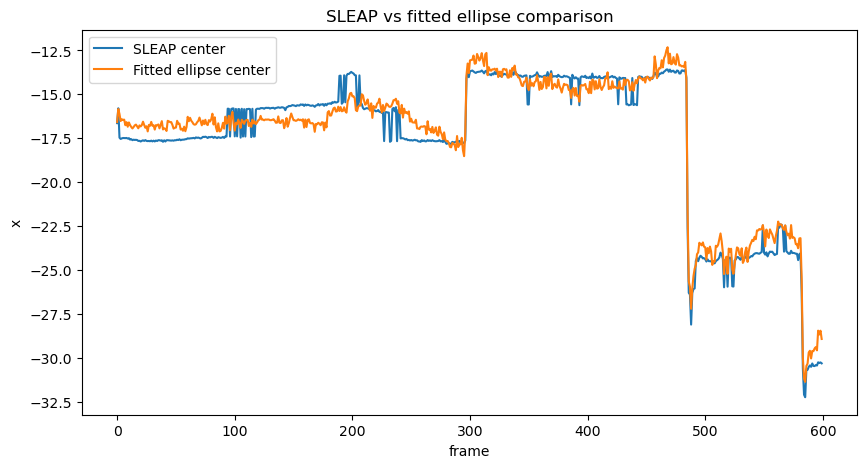

In [29]:
a = 0
b = 600
plt.figure(figsize=(10,5))
plt.title('SLEAP vs fitted ellipse comparison')
plt.plot(rotated_coordinates_dict['center'][a:b,0])
plt.plot(ellipse_center_points_data[a:b,0])
# plt.plot(moving_average_smoothing(ellipse_center_points_data[a:b,0], 10))
# plt.plot(median_filter(ellipse_center_points_data[a:b,0], size=10))
# plt.legend(['SLEAP center', 'Fitted ellipse center', '5 point moving average fitted ellipse', 'Size 5 median filter fitted ellipse'])
plt.legend(['SLEAP center', 'Fitted ellipse center'])
plt.xlabel('frame')
plt.ylabel('x')
plt.show()

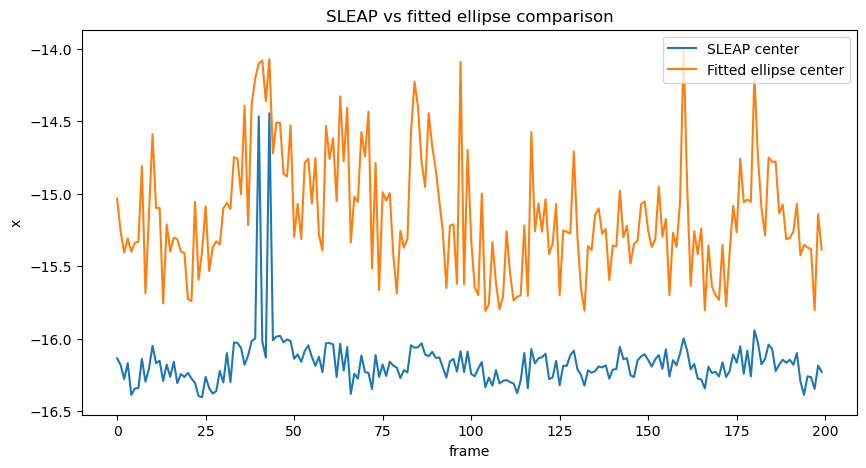

In [32]:
a = 3200
b = 3400
plt.figure(figsize=(10,5))
plt.title('SLEAP vs fitted ellipse comparison')
plt.plot(rotated_coordinates_dict['center'][a:b,0])
plt.plot(ellipse_center_points_data[a:b,0])
# plt.plot(moving_average_smoothing(ellipse_center_points_data[a:b,0], 10))
# plt.plot(median_filter(ellipse_center_points_data[a:b,0], size=10))
# plt.legend(['SLEAP center', 'Fitted ellipse center', '5 point moving average fitted ellipse', 'Size 5 median filter fitted ellipse'])
plt.legend(['SLEAP center', 'Fitted ellipse center'])
plt.xlabel('frame')
plt.ylabel('x')
plt.show()